In [1]:
import numpy
from scipy import integrate
from matplotlib import pyplot
%matplotlib inline

In [2]:
u_inf = 1.0
R = 1.0
theta = numpy.linspace(0,2*numpy.pi, 100)
x_cylinder, y_cylinder = R*numpy.cos(theta), R*numpy.sin(theta)

In [34]:
class Panel:
    def __init__(self,xa,ya,xb,yb):
        self.xa, self.ya = xa,ya
        self.xb, self.yb = xb,yb
        
        self.xc, self.yc = (xa+xb)/2, (ya+yb)/2    #center point
        self.length = numpy.sqrt((xb-xa)**2 +(yb-ya)**2)   #length of panel
        
        if xb-xa <= 0.:
            self.beta = numpy.arccos((yb-ya)/self.length)
        elif xb-xa >= 0.:
            self.beta=numpy.pi+numpy.arccos(-(yb-ya)/self.length)
            
        self.nu, self.nv = numpy.cos(self.beta), numpy.sin(self.beta)
        self.tu, self.tv = numpy.cos(self.beta+(numpy.pi/2)),numpy.sin(self.beta+(numpy.pi/2))
            
        self.sigma = 0.    #source strength
        self.vt = 0.    #tang vel
        self.xp = 0.    #press coeff

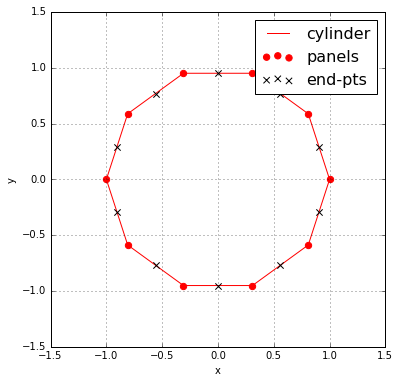

In [35]:
N_panels = 10
x_ends=R*numpy.cos(numpy.linspace(0,2*numpy.pi,N_panels+1))
y_ends = R*numpy.sin(numpy.linspace(0,2*numpy.pi,N_panels+1))

panels = numpy.empty(N_panels,dtype=object)
for i in range(N_panels):
    panels[i] = Panel(x_ends[i],y_ends[i],x_ends[i+1],y_ends[i+1])
    
size = 6
pyplot.figure(figsize =(size,size))
pyplot.grid(True)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.plot(x_ends,y_ends,color = 'r', linestyle ='-', linewidth=1)
#pyplot.plot(x_cylinder,y_cylinder,color='b',linestyle='-',linewidth =2)
pyplot.scatter([p.xa for p in panels],[p.ya for p in panels], color = 'r',s = 40)
pyplot.scatter([p.xc for p in panels],[p.yc for p in panels], color='k',s=40, zorder=3,marker='x')
pyplot.legend(['cylinder','panels','end-pts','center pts'], loc='best',prop={'size':16});

In [36]:
a = 1/4
T = .10
H = 0

R1=0.25 + T/(3*numpy.sqrt(3))
x_ends=R1*numpy.cos(numpy.linspace(0,2*numpy.pi,N_panels+1))
y_ends = R1*numpy.sin(numpy.linspace(0,2*numpy.pi,N_panels+1))

zeta = x_ends + 1j*y_ends
zeta0 = -4*a*T/(3*numpy.sqrt(3))+1j*2*a*H

z = (zeta0+zeta) + a**2/(zeta0+zeta)

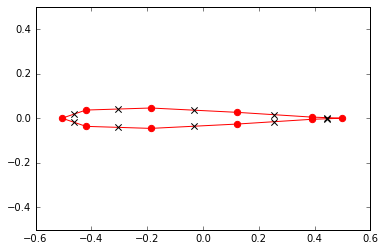

In [37]:
panels_xform = numpy.empty(N_panels,dtype=object)
for i in range(N_panels):
    panels_xform[i] = Panel(z.real[i],z.imag[i],z.real[i+1],z.imag[i+1])
pyplot.plot(z.real,z.imag,color='r')
pyplot.scatter([p.xa for p in panels_xform],[p.ya for p in panels_xform],color='r',s=40)
pyplot.ylim(-0.5,0.5)
pyplot.scatter([p.xc for p in panels_xform],[p.yc for p in panels_xform], color='k',s=40, zorder=3,marker='x');

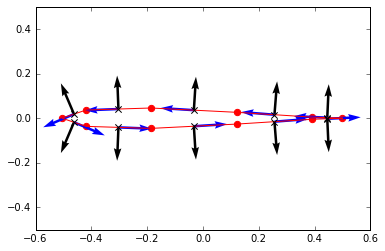

In [41]:
pyplot.plot(z.real,z.imag,color='r')
pyplot.scatter([p.xa for p in panels_xform],[p.ya for p in panels_xform],color='r',s=40)
pyplot.ylim(-0.5,0.5)
pyplot.scatter([p.xc for p in panels_xform],[p.yc for p in panels_xform], color='k',s=40, zorder=3,marker='x');
pyplot.quiver([p.xc for p in panels_xform],[p.yc for p in panels_xform],[p.nu for p in panels_xform],[p.nv for p in panels_xform],scale=10)
pyplot.quiver([p.xc for p in panels_xform],[p.yc for p in panels_xform],[p.tu for p in panels_xform],[p.tv for p in panels_xform],scale=10,color='b')